## Scientific Question: How conserved are the human APP and APLP sequences, are their E2 dimerization regions structurally distinct?

APP or amyloid precursor protein is the precursor to the amyloid beta protein that forms the pathological plaques seen in Alzheimer's disease. Recent studies have indicated that the E2 region of APP is able to form homodimers that may increase secretion of amyloid beta (Scheurmann). 

Currently, animal models of Alzheimer's disease are limited by the fact that the most effective way to induce an Alzheimer's-like pathology is using an APP single gene mutation, which is not necessarily reflective of the sporadic cases of the disease, which is up to 90% of all cases (King). 

Thus, it may be useful to try to understand an alternative pathology or biomarker for Alzheimer's that we can use to develop more sophisticated models of the disease. APLP1 or amyloid-like precursor protein 1 is part of the amyloid protein family, with research showing it can form plaques (Bayer) and is upregulated in Alzheimer's Disease (Yanagida) 

In order to acquire more data on these proteins, I relied on the National Center for Biotechnology Information's Nucleotide tool.Nucleotide is an accumulation of sequence data from research repositories like GenBank, PDB, research papers, and many others. Having access to such a wide pool of information allowed me to find sequence data for both APP (in multiple different species) along with APLP1 and successfully download isoforms that I wanted to use for this project. Here's the link: https://www.ncbi.nlm.nih.gov/nucleotide/ 

What about the structure of APLP1 & APP? This was obtained through the RCSB Protein Database, which allowed me to obtain structural information about the E2 region of APLP1 and APP. This is because the PDB acts as a repository for scientists to submit protein data often discovered through their research projects which is helpful, especially for those with more niche protein interests. As long as the paper has submitted data to PDB, you are easily able to find it and load it with ngl (more on that later). 

Scientific Hypothesis: If APLP1 and APP have conserved sequence homology (as determined by MSA) and don't differ in their E2 regions, then considering APLP1 as a potential biomarker for amyloid beta plaque investigation could be a further avenue for improving models of Alzheimer's Disease. 

First, I wanted to determine how conserved the sequence between APLP1 and APP are, with the expectation that the most conservation will be seen between the human forms of each protein. I ran a MSA between APLP1 and similarly sized isoforms of human APP, dog APP, chicken APP, and pig APP (all sourced from NCBI). This allows me to see the similarity between these sequences. Running a pairwise sequence alignment on Python is fairly straightforward, but multiple sequence alignments are best done externally so I used ClustalW to create a file format I could work with for future analysis. 

One useful way to visualize sequence conservation after running MSA is through the use of a phylogenetic tree, which organizes sequences based on conservation so that those that might be closely related are visually in close proximity. 

What about the E2 domain and its structural similarities? It is best to understand this with structural bio-informatics which means modelling the structure. I used the PDB to get PDB files of the E2 domain for both APP & APLP1 of humans. NGL view is one way to visualize proteins and alter their representations. If I were to alter their representations it would be based upon my findings doing 3d measurements to accentuate regions of homology and regions of difference. 
Understanding the structure of these compounds is important to contextualize the similarity of these compounds and interpreting the heat map results. Compound structures can be shown in 2D and 3D. The second bioinformatics analyses done in this notebook are structure images.

Both of these methods help me answer my scientific question because the MSA and tree show me the extent to which APP and APLP are conserved, as well as how similar their E2 dimerization domains are. 


## Multiple Seq Alignment between multi-species APP & APLP 

In [3]:
conda install nglview -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
#packages to import 
from Bio import SeqIO
import numpy as np
from Bio import pairwise2
from Bio.Seq import Seq
from Bio import Align
from Bio import AlignIO
from Bio.pairwise2 import format_alignment
from Bio import Phylo
from Bio.PDB import *
import nglview

## What are the packages?

Bio: This is the bioconda package that we installed at the beginning of the quarter. It has several great functionalities for conducting bioinformatics analysis in python. The ones I use in particular are the Align function (to perform a seq alignment and read them), the Phylo function (for a phylogenetic tree), and the PDB function to understand proteins. 

NGL View: NGL view was the package I used to visualize the E2 protein and is very useful for conducting 3D protein measurements and adding various representations to highlight different aspects of the structure.

In [49]:
#Load files and define objects. I chose isoforms of these proteins that were relatively close in length. 
Human_APP = SeqIO.read("Human_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Human_Len=(len(Human_APP))

#Human APLP1 was used for this file 
APLP = SeqIO.read("APLP1.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
APLP_Len=(len(APLP))

Dog_APP = SeqIO.read("Dog_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Dog_Len=(len(Dog_APP))

Pig_APP = SeqIO.read("Pig_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Pig_len=(len(Pig_APP))

Chicken_APP = SeqIO.read("Chicken_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Chicken_len=(len(Chicken_APP))

#Making fasta files into sequence objects 
APLP_Seq= APLP.seq
#Labels for clarity 
print("APLP_Seq (Human)")
#Printing the sequence 
print(APLP_Seq)
APLP_Seq_Str=str(APLP_Seq)

Human_APP_Seq= Human_APP.seq
print("Human_APP_Seq")
print(Human_APP_Seq)
Human_APP_Seq_Str=str(Human_APP_Seq)

Dog_APP_Seq= Dog_APP.seq
print("Dog_APP_Seq")
print(Dog_APP_Seq)
Dog_APP_Seq_Str=str(Dog_APP_Seq)

Chicken_APP_Seq= Chicken_APP.seq
print("Chicken_APP_Seq")
print(Chicken_APP_Seq)
Chicken_APP_Seq_Str=str(Chicken_APP_Seq)

Pig_APP_Seq= Pig_APP.seq
Pig_APP_Seq_Str=str(Pig_APP_Seq)
print("Pig_APP_Seq")
print(Pig_APP_Seq)




APLP_Seq (Human)
MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSAQVAGLCGRLTLHRDLRTGRWEPDPQRSRRCLRDPQRVLEYCRQMYPELQIARVEQATQAIPMERWCGGSRSGSCAHPHHQVVPFRCLPGEFVSEALLVPEGCRFLHQERMDQCESSTRRHQEAQEACSSQGLILHGSGMLLPCGSDRFRGVEYVCCPPPGTPDPSGTAVGDPSTRSWPPGSRVEGAEDEEEEESFPQPVDDYFVEPPQAEEEEETVPPPSSHTLAVVGKVTPTPRPTDGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEHLGPSELEAPAPGGSSEDKGGLQPPDSKDADTPMTLPKGSTEQDAASPEKEKMNPLEQYERKVNASVPRGFPFHSSEIQRDELAPAGTGVSREAVSGLLIMGAGGGSLIVLSMLLLRRKKPYGAISHGVVEVDPMLTLEEQQLRELQRHGYENPTYRFLEERP
Human_APP_Seq
MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVRVPTTAASTPDAVDKYLETPGDENEHAHFQ

In [50]:
import pandas as pd
import numpy as np 

# Take a dictionary as input to your DataFrame 
my_dict = {'HumanAPP': [Human_APP_Seq, Human_Len], 'APLP1': [APLP_Seq, APLP_Len], 'DogAPP': [Dog_APP_Seq, Dog_Len]}
#cprint(pd.DataFrame(my_dict))

data = np.array([['Name','Seq Length','Seq'],
                ['Human APP',Human_Len, Human_APP_Seq],
                ['Human APLP1',APLP_Len, APLP_Seq],
                ['Dog APP',Dog_Len, Dog_APP_Seq],
                ['Pig APP',Pig_len, Pig_APP_Seq],
                ['Chicken APP',Chicken_len, Chicken_APP_Seq]])
                
df=pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])
print(df)
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 




            Seq Length                                                Seq
Human APP          695  (M, L, P, G, L, A, L, L, L, L, A, A, W, T, A, ...
Human APLP1        651  (M, G, P, A, S, P, A, A, R, G, L, S, R, R, P, ...
Dog APP            695  (M, L, P, A, L, A, L, V, L, L, A, S, W, T, A, ...
Pig APP            695  (M, L, P, G, L, A, L, V, L, L, A, A, W, T, A, ...
Chicken APP        695  (M, L, P, H, L, A, L, L, L, L, A, A, G, A, A, ...


In [66]:
list_seq=[APLP_Seq_Str, Human_APP_Seq_Str, Dog_APP_Seq_Str, Pig_APP_Seq_Str, Chicken_APP_Seq_Str]
list_name=["Human APLP1","Human APP", "Dog APP", "Pig APP", "Chicken APP"]
ofile = open("unaligned.fasta", "w")

for i in range(len(list_seq)):

    ofile.write(">" + list_name[i] + "\n" +list_seq[i] + "\n")

#do not forget to close it

ofile.close()

In [23]:
from Bio.Align.Applications import MafftCommandline
mafft_cline=MafftCommandline(input="unaligned.fasta") 
from Bio import AlignIO
align = AlignIO.read("aligned.fasta", "fasta") 
print(align)

Alignment with 5 rows and 725 columns
MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGS...-RP Human
----------------------MLPGLALLLLAAWTARALEVPT...MQN Human
----------------------MLPALALVLLASWTARALEVPT...MQN Dog
----------------------MLPGLALVLLAAWTARALEVPT...MQN Pig
----------------------MLPHLALLLLAAGAARALEVPA...MQN Chicken


There is a regularity and pattern to the way in which I printed out each sequence. This was done on purpose, due to the lack of MSA code on Python it was necessary for me to use Clustal Omega to perform the MSA. In order to perform a MSA using Clustal Omega, all you need to do is copy and paste the printed titles and sequences and add an indentation (>) to each title. 

Visit this website: https://www.genome.jp/tools-bin/clustalw 

Below, you see the results of the alignment, which we need to visualize


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

In [53]:
from Bio import SeqIO
seq_dict = {rec.id : rec.seq for rec in SeqIO.parse("aligned.fasta", "fasta")}
seq_list=[str(rec.seq) for rec in SeqIO.parse("aligned.fasta", "fasta")]
print('There are %d sequences, all of length %d'%(len(seq_list), len(seq_list[0])))
seq_list



There are 5 sequences, all of length 725


['MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSAQVAGLCGRLTLHRDLRTGRWEPDPQRSRRCLRDPQRVLEYCRQMYPELQIARVEQATQAIPMERWCGGSRSGSCAHPHHQVVPFRCLPGEFVSEALLVPEGCRFLHQERMDQCESSTRRHQEAQEACSSQGLILHGSGMLLPCGSDRFRGVEYVCCPPPGTPD--PSGTAVGDPSTRSW-------PPGSR---V-EGAEDEE-----EEESFPQPVDDYFVEP-PQAEEEEE----------TVPPPSSHTLAVVGKVTPTPRPT-DGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEH----------------------LGPSELEA-------PAPGGSSEDKGGLQPPDSKDADTPMTLPKGSTEQDAASPEKEK------------MNPLEQYERKVNASV--PRGFPFHSSEIQRDELAPAGTGVSREAVSGLLIMGAGGGSLIVLSMLLLRRKKPYGAISHGVVEVDPMLTLEEQQLRELQRHGYENPTYRFLEE-RP',
 '----------------------MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHP-HFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVV-EVAEEEEVAEVEEEEADD

(-1.0, 725.0)

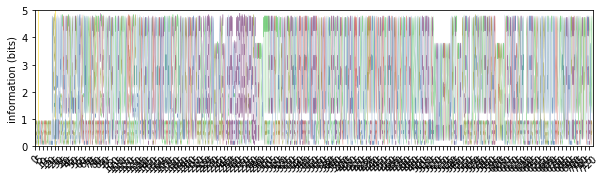

In [58]:
counts_df=logomaker.alignment_to_matrix(sequences=seq_list, to_type='counts', characters_to_ignore='.-X')
# preview counts dataframe
counts_df.head()

# create Logo object
logo = logomaker.Logo(counts_df,
                         font_name='Arial Rounded MT Bold',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
logo.ax.set_ylabel('information (bits)')
logo.ax.set_xlim([-1, len(counts_df)])

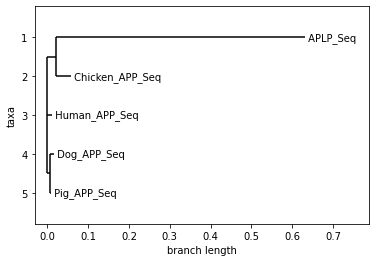

In [17]:
#Phylogenetic Clustering to see if there is any conservation between the sequences 
tree = Phylo.read('clustalw.dnd','newick')
Phylo.draw(tree)

This is the phylogenetic tree showing the relationship between the sequences. We can see that rather surprisingly, the chicken APP sequence is closer in homology to APLP compared to human APP. Let's take a look at the E2 protein domain! 

# Structural Bioinformatics of the E2 APP versus E2 APLP domain 

In [2]:
#Displaying APP E2 domain with structural bio-informatics, write observations. 
view = nglview.show_pdbid("3NYJ")  # load "APPE2" from RCSB PDB and display viewer widget, use ID from PDB 
view

NGLWidget()

In [41]:
parser = PDBParser()
APPE2_structure = parser.get_structure("3NYJ", "APPE2.pdb")

In [42]:
for model in APPE2_structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                print(atom)

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom ND1>
<Atom CD2>
<Atom CE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom N>


In [44]:
#Figuring out the distance between atoms
parser = PDBParser()
#PDB to structure 
APPE2_structure = parser.get_structure("3NYJ", "APPE2.pdb")
#This is a code check to make sure I have successfully extracted my residues 
for residue in APLPE2_structure.get_residues():
    print(residue)
#Using entities to calculate the distance between two atoms    
chain = residue.get_parent()

# Define residues of interest based on the PDB profile
residue1 = chain[54]
residue2 = chain[97]
ca1 = residue1["N"]
ca2 = residue2["CA"]
ca3 = residue2["CB"]

# Perform a distance measurement between residues of interest
distance1 = ca1 - ca2
print(distance1)
distance2 = ca1 - ca3
print(distance2)
distance3 = ca2 - ca3
print(distance3)

<Residue ASP het=  resseq=354 icode= >
<Residue GLY het=  resseq=355 icode= >
<Residue VAL het=  resseq=356 icode= >
<Residue ASP het=  resseq=357 icode= >
<Residue ILE het=  resseq=358 icode= >
<Residue TYR het=  resseq=359 icode= >
<Residue PHE het=  resseq=360 icode= >
<Residue GLY het=  resseq=361 icode= >
<Residue MET het=  resseq=362 icode= >
<Residue PRO het=  resseq=363 icode= >
<Residue GLY het=  resseq=364 icode= >
<Residue GLU het=  resseq=365 icode= >
<Residue ILE het=  resseq=366 icode= >
<Residue SER het=  resseq=367 icode= >
<Residue GLU het=  resseq=368 icode= >
<Residue HIS het=  resseq=369 icode= >
<Residue GLU het=  resseq=370 icode= >
<Residue GLY het=  resseq=371 icode= >
<Residue PHE het=  resseq=372 icode= >
<Residue LEU het=  resseq=373 icode= >
<Residue ARG het=  resseq=374 icode= >
<Residue ALA het=  resseq=375 icode= >
<Residue LYS het=  resseq=376 icode= >
<Residue MET het=  resseq=377 icode= >
<Residue ASP het=  resseq=378 icode= >
<Residue LEU het=  resseq

KeyError: (' ', 54, ' ')

In [4]:
#Displaying APLP1 E2 domain
view = nglview.show_pdbid("3PMR")  # load "APLP1 E2" from RCSB PDB and display viewer widget
view

NGLWidget()

In [43]:
#Figuring out the distance between atoms
parser = PDBParser()
#PDB to structure 
APLPE2_structure = parser.get_structure("3PMR", "APLPE2.pdb")
#This is a code check to make sure I have successfully extracted my residues 
for residue in APLPE2_structure.get_residues():
    print(residue)
#Using entities to calculate the distance between two atoms    
chain = residue.get_parent()

# Define residues of interest based on the PDB profile
residue1 = chain[54]
residue2 = chain[97]
ca1 = residue1["N"]
ca2 = residue2["CA"]
ca3 = residue2["CB"]

# Perform a distance measurement between residues of interest
distance1 = ca1 - ca2
print(distance1)
distance2 = ca1 - ca3
print(distance2)
distance3 = ca2 - ca3
print(distance3)

<Residue ASP het=  resseq=354 icode= >
<Residue GLY het=  resseq=355 icode= >
<Residue VAL het=  resseq=356 icode= >
<Residue ASP het=  resseq=357 icode= >
<Residue ILE het=  resseq=358 icode= >
<Residue TYR het=  resseq=359 icode= >
<Residue PHE het=  resseq=360 icode= >
<Residue GLY het=  resseq=361 icode= >
<Residue MET het=  resseq=362 icode= >
<Residue PRO het=  resseq=363 icode= >
<Residue GLY het=  resseq=364 icode= >
<Residue GLU het=  resseq=365 icode= >
<Residue ILE het=  resseq=366 icode= >
<Residue SER het=  resseq=367 icode= >
<Residue GLU het=  resseq=368 icode= >
<Residue HIS het=  resseq=369 icode= >
<Residue GLU het=  resseq=370 icode= >
<Residue GLY het=  resseq=371 icode= >
<Residue PHE het=  resseq=372 icode= >
<Residue LEU het=  resseq=373 icode= >
<Residue ARG het=  resseq=374 icode= >
<Residue ALA het=  resseq=375 icode= >
<Residue LYS het=  resseq=376 icode= >
<Residue MET het=  resseq=377 icode= >
<Residue ASP het=  resseq=378 icode= >
<Residue LEU het=  resseq

C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6665.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6675.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6685.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6829.
  warnings.warn(


KeyError: (' ', 54, ' ')

In [39]:
parser = PDBParser()
APLPE2_structure = parser.get_structure("3PMR", "APLPE2.pdb")

C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6665.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6675.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6685.
  warnings.warn(
C:\Users\nehas\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6829.
  warnings.warn(


In [40]:
for model in APLPE2_structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                print(atom)

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom SD>
<Atom CE>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<At

<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom SD>
<Atom CE>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<At

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom P>
<Atom O1>
<Atom O2>
<Atom O3>
<Atom O4>
<Atom P>
<Atom O1>
<Atom O2>
<Atom O3>
<Atom O4>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Atom O>
<Ato

# conclusions
Based on the phylogenetic tree, it appears that APLP1 is actually more closely aligned to chicken APP compared to human, which indicates that the two sequences may not be as conserved as I hypothesized. The structural bio-informatics indicates that there are different residues between the E2 domain of APLP1 compared to APP, which may warrant further laboratory experimentation to assess whether these structural differences have any kind of meaningful or significant functional effect 

 ## Unsuccessful Alignment & Seq Logo Attempts 

In [23]:
conda install -c conda-forge weblogo

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nehas\anaconda3

  added / updated specs:
    - weblogo



The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    weblogo-3.7.11             |     pyhd8ed1ab_0         504 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         504 KB

The following NEW packages will be INSTALLED:

  weblogo            conda-forge/noarch::weblogo-3.7.11-pyhd8ed1ab_0




weblogo-3.7.11       | 504 KB    |            |   0% 
weblogo-3.7.11       | 504 KB    | 3          |   3% 
weblogo-3.7.11       | 504 KB    | #########8 |  98% 
weblogo-3.7.11       | 504 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executin

Sequence logo with MSA/other species & APPs & APLP1 --> Seq Logo

In [32]:
from weblogo import *
fin = open('clustalw.aln')
seqs = read_seq_data(fin)
logodata = LogoData.from_seqs(seqs)
logooptions = LogoOptions()
logooptions.title = "MSA APLP with Multi-Species APP"
logoformat = LogoFormat(logodata, logooptions)
eps = eps_formatter(logodata, logoformat)


In [21]:
!pip install biopython pandas seqlogo

  Created wheel for seqlogo: filename=seqlogo-5.29.8-py2.py3-none-any.whl size=19419 sha256=f4d324a5210497233877649a8f917fd1b24fc48dfed7c5c41b5437cf463d5cf3
  Stored in directory: c:\users\nehas\appdata\local\pip\cache\wheels\70\8d\81\cc8e9e321982bb0443f3362e332258f609c5cc1c0fec61f440
Successfully built seqlogo


In [23]:
from Bio import AlignIO
import pandas as pd
import seqlogo
    

In [34]:
alignmentFile = "clustalw.aln"
alignment = AlignIO.read(alignmentFile, "clustal")
print(alignment)

def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
    alnRows = aln.get_alignment_length()
    compDict = {char:[0]*alnRows for char in characters}
    for record in aln:
        header = record.id
        seq = record.seq
    for aaPos in range(len(seq)):
        aa = seq[aaPos]
        if aa in characters:
            compDict[aa][aaPos] += 1    
    return pd.DataFrame.from_dict(compDict)

Alignment with 5 rows and 719 columns
----------------------MLPALALVLLASWTARALEVPT...MQN Dog_APP_Seq
----------------------MLPGLALVLLAAWTARALEVPT...MQN Pig_APP_Seq
----------------------MLPGLALLLLAAWTARALEVPT...MQN Human_APP_Seq
----------------------MLPHLALLLLAAGAARALEVPA...MQN Chicken_APP_Seq
MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGS...RP- APLP_Seq


In [35]:
alignmentSiteCompDF = alnSiteCompositionDF(alignment)
alignmentSiteCompDF

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
715,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
717,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
alignmentSiteFreqDF = alignmentSiteCompDF.div(alignmentSiteCompDF.sum(axis=1), axis=0)

In [37]:
alignmentSiteFreqSeqLogo= seqlogo.Ppm(alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(alignmentSiteFreqSeqLogo, ic_scale = False, format = 'svg', size = 'large')

ValueError: All or some PPM columns do not add to 1